# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset

In [2]:
data = pd.read_csv('data.csv', index_col='Date/Time')
data

,ISS Latitude,ISS Longitude,MI_X (µT),MI_Y (µT),MI_Z (µT),Temperature (°C)
Date/Time,,,,,,
2021-04-22 13:57:09.543388,-47.212235,76.437753,4.624717,8.101723,7.200235,30.7821
2021-04-22 13:57:20.028311,-47.496254,77.350902,8.608018,14.286917,12.647129,30.8182
2021-04-22 13:57:30.488157,-47.747431,78.189963,11.523164,19.480419,17.299894,30.8182
2021-04-22 13:57:40.978215,-47.991795,79.037446,13.994987,23.589293,20.642420,30.8182
2021-04-22 13:57:51.457418,-48.252575,79.979309,15.953756,26.988495,23.597565,30.8362
...,...,...,...,...,...,...
2021-04-22 16:52:53.760041,-23.361424,-7.034313,6.736912,28.151909,39.960793,30.2592
2021-04-22 16:53:04.297911,-23.883611,-6.555795,6.644437,28.037600,40.073650,30.3314
2021-04-22 16:53:14.768474,-24.356762,-6.117104,6.773014,28.061943,40.039501,30.1511


In [3]:
data.columns

Index(['ISS Latitude', 'ISS Longitude', 'MI_X (µT)', 'MI_Y (µT)', 'MI_Z (µT)',
       'Temperature (°C)'],
      dtype='object')

# Index recorded date/time values

In [4]:
data.index = pd.to_datetime(data.index)
data.index

DatetimeIndex(['2021-04-22 13:57:09.543388', '2021-04-22 13:57:20.028311',
               '2021-04-22 13:57:30.488157', '2021-04-22 13:57:40.978215',
               '2021-04-22 13:57:51.457418', '2021-04-22 13:58:01.958980',
               '2021-04-22 13:58:12.487666', '2021-04-22 13:58:22.968106',
               '2021-04-22 13:58:33.447997', '2021-04-22 13:58:43.918014',
               ...
               '2021-04-22 16:52:01.400417', '2021-04-22 16:52:11.898228',
               '2021-04-22 16:52:22.378068', '2021-04-22 16:52:32.840353',
               '2021-04-22 16:52:43.298669', '2021-04-22 16:52:53.760041',
               '2021-04-22 16:53:04.297911', '2021-04-22 16:53:14.768474',
               '2021-04-22 16:53:25.270123', '2021-04-22 16:53:35.729491'],
              dtype='datetime64[ns]', name='Date/Time', length=1010, freq=None)

In [5]:
data.iloc[0]

ISS Latitude       -47.212235
ISS Longitude       76.437753
MI_X (µT)            4.624717
MI_Y (µT)            8.101723
MI_Z (µT)            7.200235
Temperature (°C)    30.782100
Name: 2021-04-22 13:57:09.543388, dtype: float64

In [6]:
data.shape

(1010, 6)

# Calculate the total magnetic field from its vector components

In [7]:
data['MI_TOT'] = (data['MI_X (µT)']**2 + data['MI_Y (µT)']**2 + data['MI_Z (µT)']**2)**0.5


In [8]:
data.shape

(1010, 7)

In [9]:
data

,ISS Latitude,ISS Longitude,MI_X (µT),MI_Y (µT),MI_Z (µT),Temperature (°C),MI_TOT
Date/Time,,,,,,,
2021-04-22 13:57:09.543388,-47.212235,76.437753,4.624717,8.101723,7.200235,30.7821,11.784282
2021-04-22 13:57:20.028311,-47.496254,77.350902,8.608018,14.286917,12.647129,30.8182,20.932363
2021-04-22 13:57:30.488157,-47.747431,78.189963,11.523164,19.480419,17.299894,30.8182,28.487829
2021-04-22 13:57:40.978215,-47.991795,79.037446,13.994987,23.589293,20.642420,30.8182,34.328179
2021-04-22 13:57:51.457418,-48.252575,79.979309,15.953756,26.988495,23.597565,30.8362,39.239601
...,...,...,...,...,...,...,...
2021-04-22 16:52:53.760041,-23.361424,-7.034313,6.736912,28.151909,39.960793,30.2592,49.343499
2021-04-22 16:53:04.297911,-23.883611,-6.555795,6.644437,28.037600,40.073650,30.3314,49.357400
2021-04-22 16:53:14.768474,-24.356762,-6.117104,6.773014,28.061943,40.039501,30.1511,49.360997


# Plot the recorded data against time

array([<AxesSubplot:xlabel='Date/Time'>, <AxesSubplot:xlabel='Date/Time'>,
       <AxesSubplot:xlabel='Date/Time'>, <AxesSubplot:xlabel='Date/Time'>,
       <AxesSubplot:xlabel='Date/Time'>, <AxesSubplot:xlabel='Date/Time'>,
       <AxesSubplot:xlabel='Date/Time'>], dtype=object)

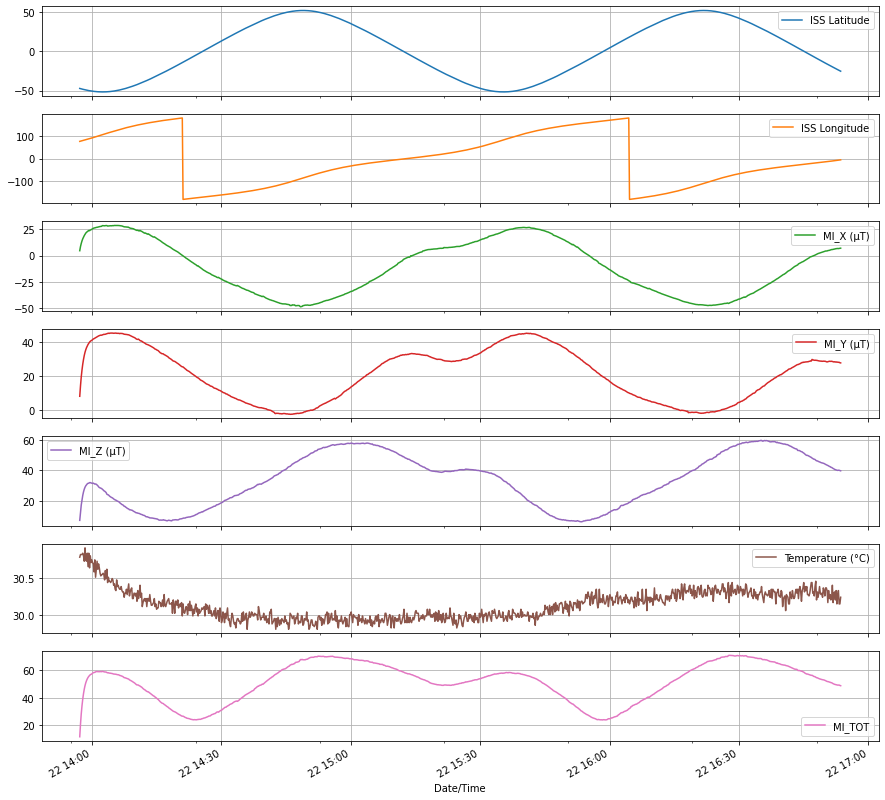

In [10]:
data[['ISS Latitude','ISS Longitude', 'MI_X (µT)','MI_Y (µT)','MI_Z (µT)',
      'Temperature (°C)', 'MI_TOT']].plot(figsize=(15,15), subplots=True, grid=True)

Text(0, 0.5, 'Magnetic Field Strength - X axis (µT)')

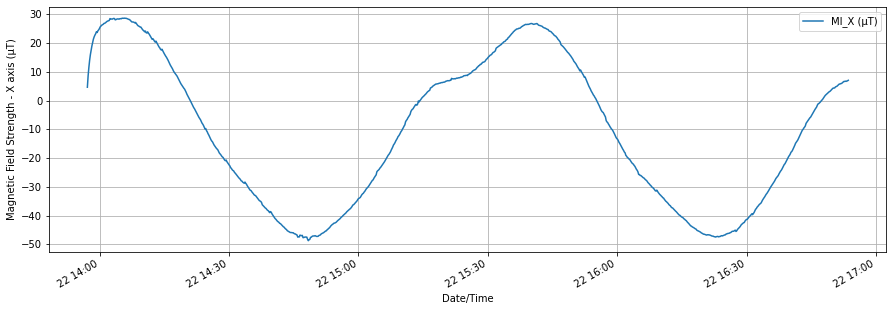

In [11]:
ax_magX = data[['MI_X (µT)']].plot(figsize=(15,5), subplots=True, grid=True)[0]
ax_magX.set_ylabel('Magnetic Field Strength - X axis (µT)')

Text(0, 0.5, 'Magnetic Field Strength - Y axis (µT)')

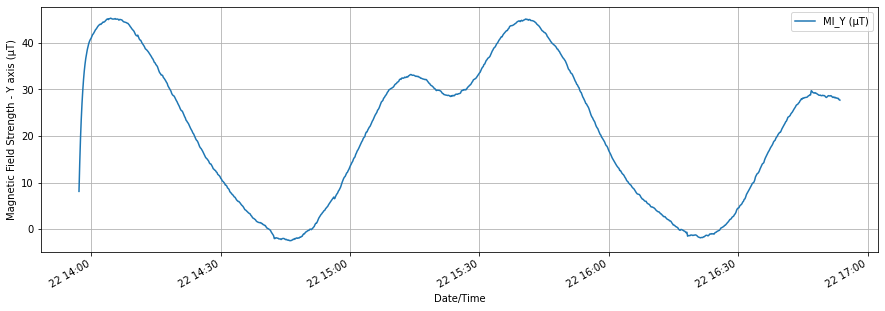

In [12]:
ax_magY = data[['MI_Y (µT)']].plot(figsize=(15,5), subplots=True, grid=True)[0]
ax_magY.set_ylabel('Magnetic Field Strength - Y axis (µT)')

Text(0, 0.5, 'Magnetic Field Strength - Z axis (µT)')

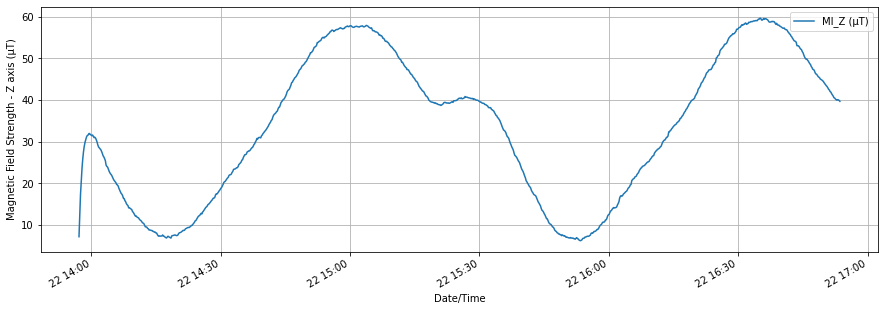

In [13]:
ax_magZ = data[['MI_Z (µT)']].plot(figsize=(15,5), subplots=True, grid=True)[0]
ax_magZ.set_ylabel('Magnetic Field Strength - Z axis (µT)')

Text(0, 0.5, 'Total Magnetic Field Strength (µT)')

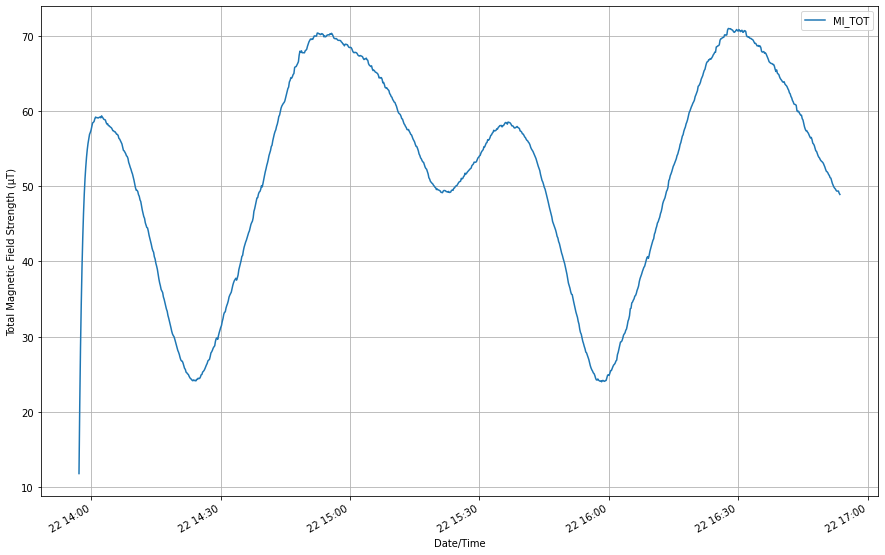

In [14]:
ax_magTot = data[['MI_TOT']].plot(figsize=(15,10), subplots=True, grid=True)[0]
ax_magTot.set_ylabel('Total Magnetic Field Strength (µT)')

Text(0, 0.5, 'Temperature (°C)')

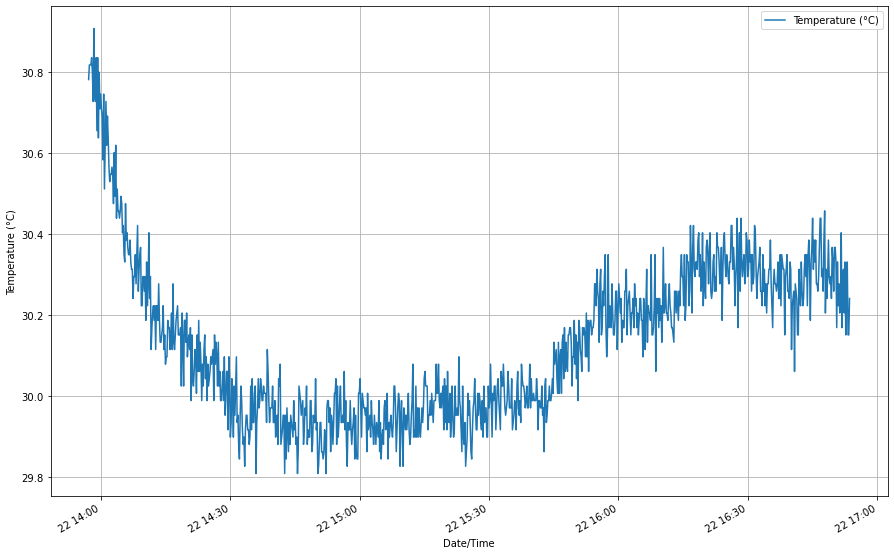

In [15]:
ax_temp = data[['Temperature (°C)']].plot(figsize=(15,10), subplots=True, grid=True)[0]
ax_temp.set_ylabel('Temperature (°C)')

# Find location values with strongest and weakest magnetic fields

In [16]:
mag_max = data['MI_TOT'].max()

mag_min = data['MI_TOT'].min()

mag_dif = mag_max - mag_min


lat_max = data.loc[data['MI_TOT'] == mag_max, 'ISS Latitude']
lon_max = data.loc[data['MI_TOT'] == mag_max, 'ISS Longitude']

lat_min = data.loc[data['MI_TOT'] == mag_min, 'ISS Latitude']
lon_min = data.loc[data['MI_TOT'] == mag_min, 'ISS Longitude']

In [17]:
print("Maximum magnetic field strength inside ISS: " + str(round(mag_max, 2)) + "µT") 
print(" ")
print("Mimumun magnetic field strength inside ISS: " + str(round(mag_min, 2)) + "µT")
print(" ")
print("The range of magnetic field strength experienced inside ISS: " + str(round(mag_dif, 2)) + "µT")

Maximum magnetic field strength inside ISS: 70.98µT
 
Mimumun magnetic field strength inside ISS: 11.78µT
 
The range of magnetic field strength experienced inside ISS: 59.2µT


In [18]:
print(lat_max)
print(" ")
print(lon_max)

Date/Time
2021-04-22 16:27:43.657640    46.268818
Name: ISS Latitude, dtype: float64
 
Date/Time
2021-04-22 16:27:43.657640   -76.507585
Name: ISS Longitude, dtype: float64


In [19]:
print(lat_min)
print(" ")
print(lon_min)

Date/Time
2021-04-22 13:57:09.543388   -47.212235
Name: ISS Latitude, dtype: float64
 
Date/Time
2021-04-22 13:57:09.543388    76.437753
Name: ISS Longitude, dtype: float64
